In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('housingprice', header = None) #read from dataset
data
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

,0,1
0,64,2.3
1,74,2.6
2,86,3.9
3,117,3.8
4,166,3.9


In [36]:
X

0     64
1     74
2     86
3    117
4    166
5    170
6    200
7    210
8    250
Name: 0, dtype: int64

In [37]:
y

0    2.3
1    2.6
2    3.9
3    3.8
4    3.9
5    4.2
6    4.0
7    4.3
8    4.1
Name: 1, dtype: float64

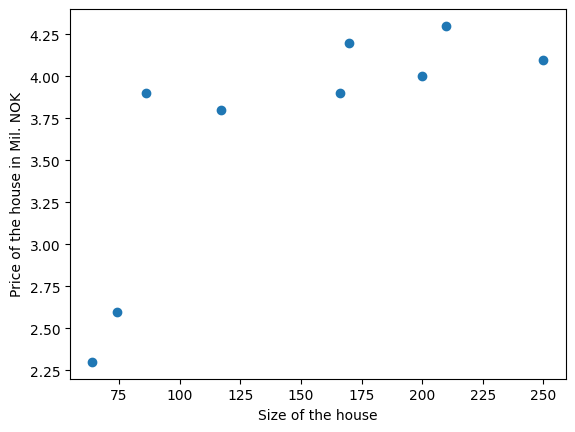

In [38]:
plt.scatter(X, y)
plt.xlabel('Size of the house')
plt.ylabel('Price of the house in Mil. NOK')
plt.show()

$J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{i})-y^i)}^2$

$h_{\theta}(x)=\theta_1 x + \theta_2$

Minimize $J(\theta_1,\theta_2)$

$\theta_2=0$

$h_{\theta}(x)=\theta_1 x$

Minimize $J(\theta_1,\theta_2)=\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}-y^i)}^2$

In [39]:
def J(X, y, t):
    temp = t * X - y
    return np.sum(np.power(temp, 2)) / (2*m)

In [40]:
def cost(X,y,theta):
    l = []
    for i in theta:
        l.append(float(J(X,y,i)))
    return l

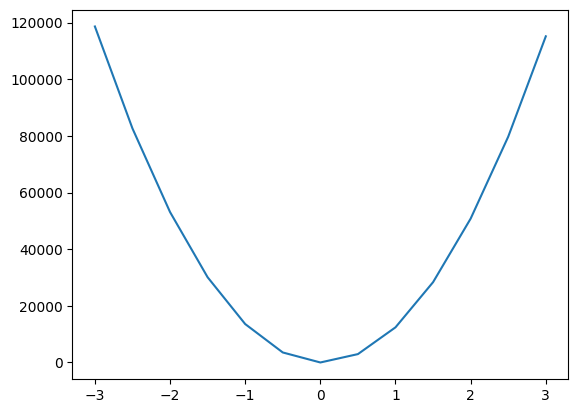

In [41]:
theta = np.arange(-3.0, 3.5, 0.5)
plt.plot(theta, cost(X,y,theta))
plt.show()

In [42]:
theta1 = np.arange(-20.0, 20.5, 0.5)
theta2 = np.arange(-20.0, 20.5, 0.5)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)

In [43]:
n_rows = data.shape[0]
X=data.iloc[:,0].to_numpy().reshape(n_rows,1)
# Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)

In [44]:
X

array([[  1.,  64.],
       [  1.,  74.],
       [  1.,  86.],
       [  1., 117.],
       [  1., 166.],
       [  1., 170.],
       [  1., 200.],
       [  1., 210.],
       [  1., 250.]])

In [45]:
def J(X, y, t):
    m=len(y)
    predictions=X.dot(t)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)

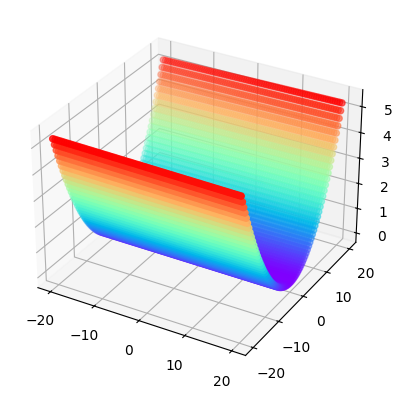

In [46]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
zaxis = cost(X,y,theta)
# ax.scatter(xaxis, yaxis, zaxis, zdir='z', c= 'red')
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
plt.show()

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.data.shape)

(20640, 8)


In [48]:
df=pd.DataFrame(housing.data, columns=housing.feature_names)
y=housing.target

In [49]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [50]:
X = df.values
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))
X

array([[-0.0045978 , -0.00368526, -0.00463525, ..., -0.00475894,
        -0.00377239, -0.00824395],
       [-0.00459847, -0.00424382, -0.00465609, ..., -0.00477138,
        -0.00377295, -0.00824367],
       [-0.00462762, -0.00337805, -0.00459884, ..., -0.00475205,
        -0.00377323, -0.00824423],
       ...,
       [-0.00478283, -0.00435553, -0.00468493, ..., -0.00476536,
        -0.00372911, -0.00821574],
       [-0.00477816, -0.0043276 , -0.00468146, ..., -0.00477101,
        -0.00372911, -0.00821853],
       [-0.0047636 , -0.00438346, -0.00468355, ..., -0.00475722,
        -0.00373078, -0.0082163 ]])

In [51]:

from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
X

array([[-0.03081891,  0.00023925],
       [ 0.02724492, -0.00013044],
       [-0.02596048,  0.00055953],
       ...,
       [-0.01168613, -0.0003605 ],
       [-0.01911503, -0.00035733],
       [-0.00107345, -0.00035386]])

In [52]:
X_approx_pca = pca.inverse_transform(X)
ratio_pca = np.mean((df.values-X_approx_pca).T.dot(df.values-X_approx_pca))/np.mean(df.values.T.dot(df.values))
ratio_pca

np.float64(0.9999776698900754)

In [53]:
X.shape

(20640, 2)

In [54]:
def J(X, y, t):
    temp = np.dot(X,t) - y
    return np.sum(np.power(temp, 2)) / (2*m)

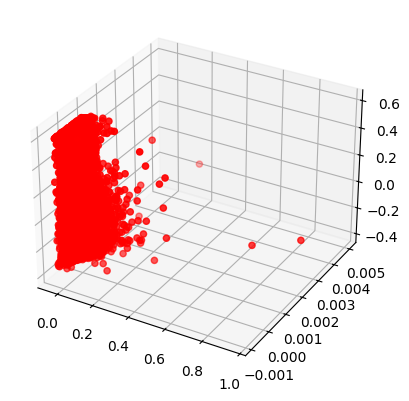

In [55]:
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in X]
yaxis = [row[1] for row in X]
ax.scatter(xaxis, yaxis, y, zdir='z', c= 'red')
plt.show()

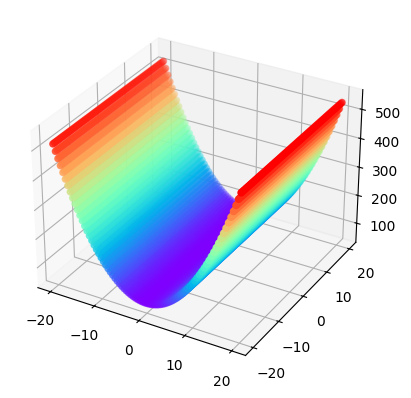

In [56]:
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_1,\theta_2)$ for $(j=0 and j=1)$ 

In [ ]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)
computeCost(X,y)

In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking   num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each  iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(J(X,y,theta))
    
    return theta, J_history
theta,J_history = gradientDescent(X,y,[0,0],0.01,10)
print("h(x) ="+str(round(theta[0],4))+" + "+str(round(theta[1],4))+"x1")

In [ ]:
data = pd.read_csv('CASP.csv') #read from dataset
data
X = data[['F8', 'F9']] # read first column
y = data['RMSD'] # read second column
m = len(y) # number of training example
data.head() # view first few rows of the data

In [ ]:
#Normalize X and y
X = (X - np.mean(X))/(np.max(X) - np.min(X))
y = (y - np.mean(y))/(np.max(y) - np.min(y))

In [ ]:
X

In [ ]:
y

In [ ]:
theta1 = np.arange(-20.0, 21, 1)
theta2 = np.arange(-20.0, 21, 1)
theta=[]
for t1 in theta1:
    for t2 in theta2:
        t = []
        t.append(float(t1))
        t.append(float(t2))
        theta.append(t)
theta
from mpl_toolkits.mplot3d import axes3d, Axes3D  
import matplotlib.colors
fig = plt.figure()
ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
xaxis = [row[0] for row in theta]
yaxis = [row[1] for row in theta]
theta
zaxis = np.array(cost(X,y.tolist(),theta))
colormap = plt.get_cmap("rainbow")
norm = matplotlib.colors.Normalize(vmin=min(zaxis), vmax=max(zaxis))

ax.scatter(xaxis, yaxis, zaxis, c=colormap(norm(zaxis)))
# ax.plot_surface(xaxis, yaxis, zaxis, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
plt.show()

$\frac{\partial}{\partial\theta_0}J(\theta_0,\theta_2) = \frac{\partial}{\partial\theta_0}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i} + \theta_0 -y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}$

$\frac{\partial}{\partial\theta_1}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_1}\frac{1}{2m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}^2 = \frac{1}{m}\sum_{i=1}^{m}{(\theta_1x^{i}+ \theta_0-y^i)}x^i$

In [ ]:
iterations = 1000
alpha = 10
print(iterations, alpha)
def gradientDescent(X, y, theta1, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta1) - y
        temp = np.dot(X.T, temp)
        theta1 = theta1 - (alpha/m) * temp
    return theta1
theta1 = gradientDescent(X, y, [-20,20], alpha, iterations)

print(theta1)
print(J(X,y,theta1))